Ontario Guaranteed Annual Income System benefit rates

(For Ages 65 to 74) Married Pensioner, Spouse 60-64

Maximum payment and allowable private income amounts:

The guaranteed income levels for July 1, 2024 to June 30, 2025 are:

$87 monthly for single seniors (maximum monthly payment amount), your annual private income must be less than $4,176

$174 monthly for senior couples (maximum monthly payment amount), your annual private income must be less than $8,352

The data is organized by private income levels. GAINS payments are provided on top of the Old Age Security (OAS) pension and the Guaranteed Income Supplement (GIS) payments you may receive from the federal government.

Visualization 1: GAINS Benefit vs. Total Family Income (Python)

Description and Justification

Software Used: Python (Matplotlib/Seaborn)

Python is ideal for creating detailed, reproducible plots. Its libraries allow for customization and automation, ensuring the results are easy to replicate.


Intended Audience:

Policymakers and financial analysts evaluating the GAINS program's impact on low-income families.


Message to Convey:

This visualization explores the relationship between GAINS benefits and total family income to identify how GAINS adjusts across income levels.


Design Principles:

- Substantive: Focused on accurately representing the GAINS distribution.
- Perceptual: Used a scatter plot for simplicity, allowing trends to emerge clearly.
- Aesthetic: Clean layout with high-contrast colors for accessibility.


Reproducibility:

The visualization is entirely script-based, ensuring reproducibility. Data cleaning and plotting steps are documented in Python code.


Accessibility:

Used a clear legend, labeled axes, and a color-blind-friendly palette to ensure inclusivity.


Impact:

Communities reliant on GAINS will benefit from better insights into how the program addresses income inequality.


Feature Selection:

Focused on GAINS benefits and family income, as these are most relevant to program evaluation.


Underwater Labour:

Cleaning the "Total Family Income" column (removing commas, converting to float) and preparing the data for plotting.



_________________________________________________________________________________________________________________________

Visualization 2: Family Income Heatmap by Income Brackets (Tableau Public)

Description and Justification

Software Used: Tableau Public

Tableau's interactive heatmap features provide intuitive visual patterns, making it suitable for exploring income trends across brackets.


Intended Audience:

General public and researchers analyzing income disparities in Ontario.


Message to Convey:

The heatmap visualizes family income distribution, highlighting income inequality patterns and outliers.


Design Principles:

- Substantive: Focused on representing variations in family income.
- Perceptual: Used a sequential gradient to emphasize differences.
- Aesthetic: Applied a clean, minimal design with tooltips for interactivity.


Reproducibility:

Tableau Public does not fully support automation, but preparation steps will be documented, ensuring partial reproducibility.


Accessibility:

Used a high-contrast color palette and labeled axes to ensure readability. Shared the visualization publicly for accessibility.


Impact:

Policymakers and advocacy groups can use this to identify trends and address gaps in income support.


Feature Selection:

Included total family income and income brackets; excluded details like OAS and GIS for simplicity.


Underwater Labour:

Cleaning income data for Tableau import and configuring heatmap settings.

Step 1: Load and Prepare the Data

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '02_activities/assignments/Ontario Guaranteed Annual Income System benefit rates.csv'
data = pd.read_csv(file_path)

# Data cleaning: Ensure columns are strings before removing commas
for col in ["Private Income (min.)",
            "Private Income (max.)",
            "Total Family Income",
            "GAINS",
            "Pensioner - Total"]:
    # Ensure the column exists in the dataset
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(",", "").astype(float)

# Add a column for income brackets (categorical bins)
income_bins = pd.cut(
    data["Total Family Income"],
    bins=[0, 500, 1000, 1500, 2000, 2500, 3000],
    labels=["0-500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000"]
)
data["Income Bracket"] = income_bins


# Display the first few rows to ensure the data is loaded and processed correctly
print(data.head())


   _id  Private Income (min.)  Private Income (max.)  GAINS  Pensioner - OAS   \
0    1                    0.0                  47.99   83.0            713.34   
1    2                   48.0                  95.99   83.0            713.34   
2    3                   96.0                 143.99   83.0            713.34   
3    4                  144.0                 191.99   83.0            713.34   
4    5                  192.0                 239.99   83.0            713.34   

   Pensioner - GIS  Pensioner - Total Spouse - Total  Total Family Income  \
0           641.35            1354.69       1,354.69              2792.38   
1           641.35            1354.69       1,351.69              2793.38   
2           641.35            1354.69       1,348.69              2794.38   
3           641.35            1354.69       1,345.69              2795.38   
4           641.35            1354.69       1,342.69              2796.38   

  Income Bracket  
0      2500-3000  
1      2500-

Step 2: Visualization 1 – Scatter Plot

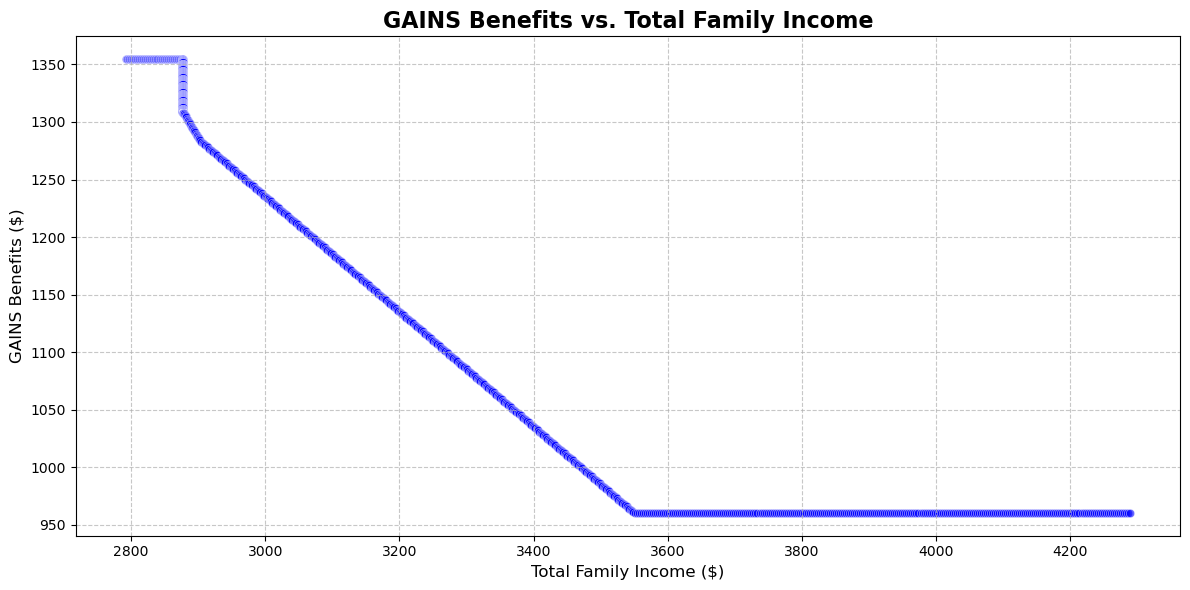

In [25]:
# Scatter plot: GAINS benefits vs. Total Family Income
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Total Family Income",
    y="Pensioner - Total",
    data=data,
    alpha=0.6,
    color="blue"
)
plt.title("GAINS Benefits vs. Total Family Income", fontsize=16, weight="bold")
plt.xlabel("Total Family Income ($)", fontsize=12)
plt.ylabel("GAINS Benefits ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Step 3: Visualization 2 – Grouped Bar Chart

C:\Users\khali\AppData\Local\Temp\ipykernel_13912\2050920102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby("Income Bracket")[["GAINS",


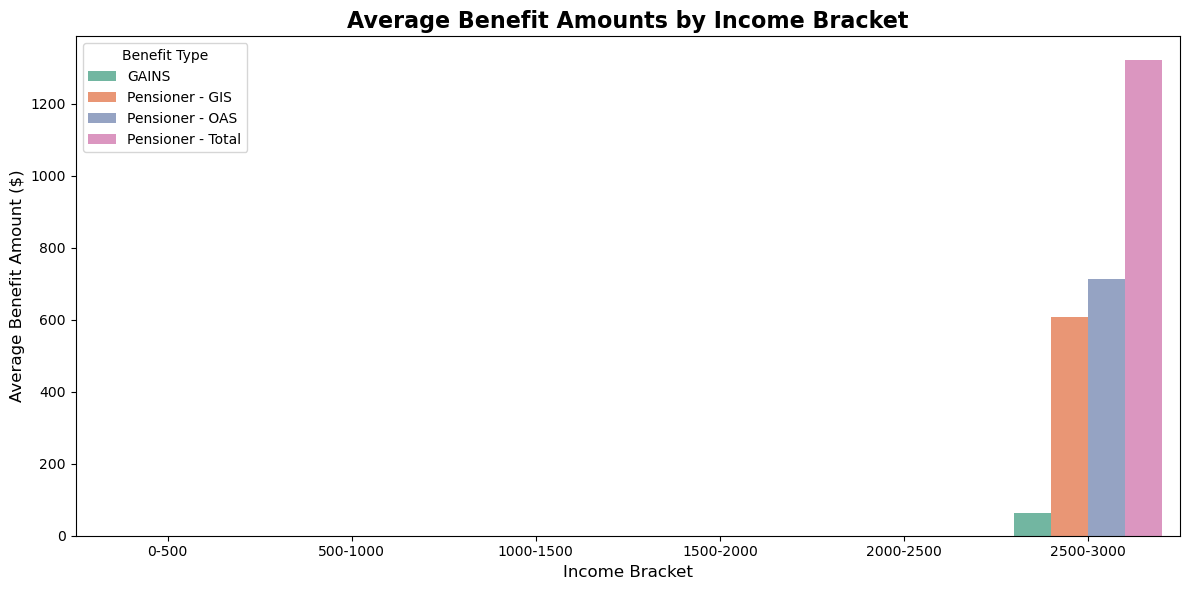

In [28]:
# Aggregating data for bar chart
aggregated_data = data.groupby("Income Bracket")[["GAINS", 
                                                  "Pensioner - GIS",
                                                  "Pensioner - OAS ",
                                                  "Pensioner - Total"]].mean().reset_index()

# Melt data for grouped bar plot
melted_data = pd.melt(
    aggregated_data,
    id_vars="Income Bracket",
    var_name="Benefit Type",
    value_name="Amount"
)

# Plot: Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Income Bracket",
    y="Amount",
    hue="Benefit Type",
    data=melted_data,
    palette="Set2"
)
plt.title("Average Benefit Amounts by Income Bracket", fontsize=16, weight="bold")
plt.xlabel("Income Bracket", fontsize=12)
plt.ylabel("Average Benefit Amount ($)", fontsize=12)
plt.legend(title="Benefit Type", fontsize=10)
plt.tight_layout()
plt.show()


Step 4: Visualization 3 – pairplot

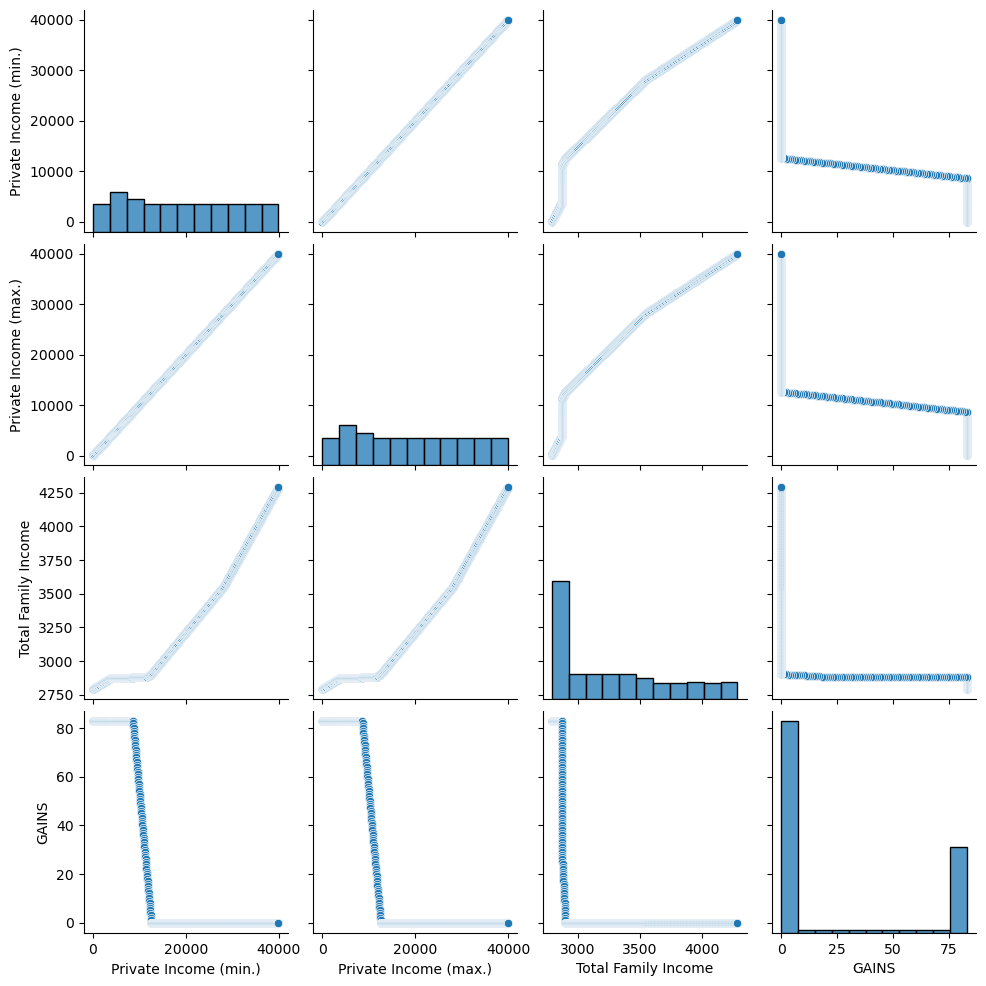

In [32]:
numeric_cols = ["Private Income (min.)", 
                "Private Income (max.)", 
                "Total Family Income", 
                "GAINS"]

sns.pairplot(data[numeric_cols])

Step 5: Visualization 4 – Dynamic plot

In [33]:
import plotly.express as px

# Assuming 'Total Family Income' and 'GAINS' are the columns to plot dynamically
fig = px.scatter(
    data, 
    x='Total Family Income', 
    y='GAINS',
    color='Income Bracket',  # Optional: color by income bracket or another column
    title='Total Family Income vs GAINS Benefits',
    labels={'Total Family Income': 'Total Family Income ($)', 'GAINS': 'GAINS Benefits ($)'},
    hover_data=['Income Bracket', 'Private Income (min.)']  # Add more columns to show when hovering
)

# Show the plot
fig.show()